In [53]:
pip install resampy 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
from keras import regularizers
import os
mylist= os.listdir("E:/capstone/e/archive/Raw_data/wavfiles")
type(mylist)

list

In [56]:
print(mylist[1801])

male2_angry_10a_2.wav


In [57]:
data, sampling_rate = librosa.load('E:/capstone/archive/Raw_data/wavfiles/female1_angry_1a_1.wav')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['cm', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


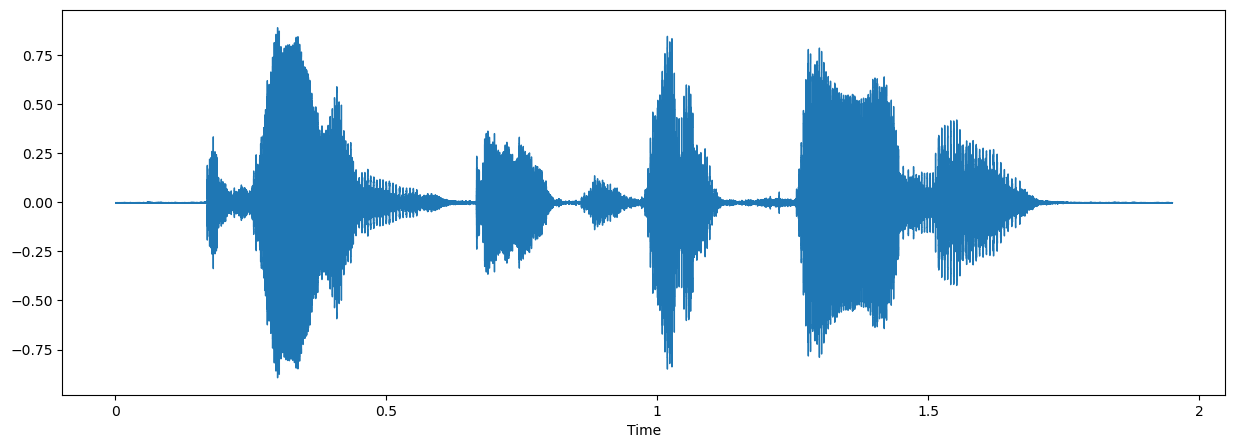

In [58]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

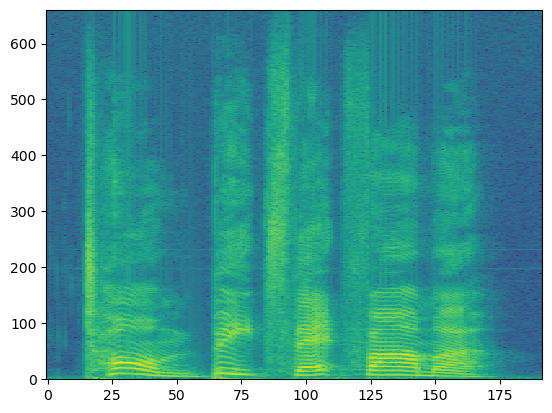

In [59]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('E:/capstone/archive/Raw_data/wavfiles/female1_angry_1a_1.wav')

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

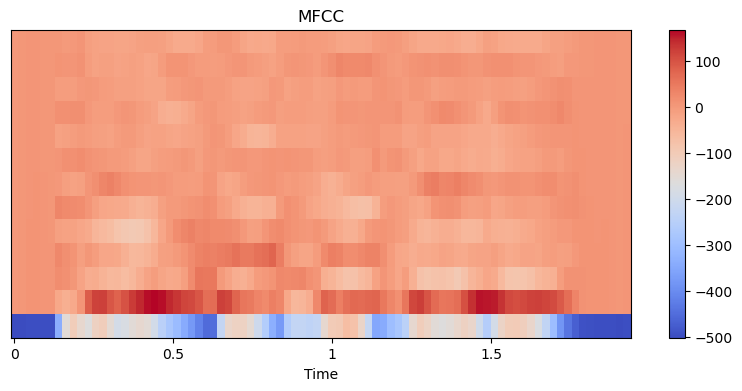

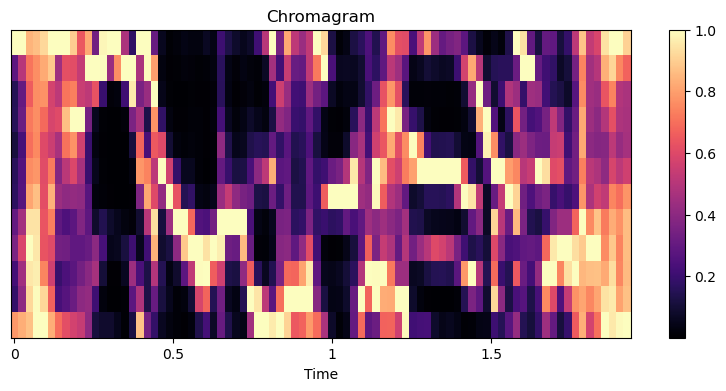

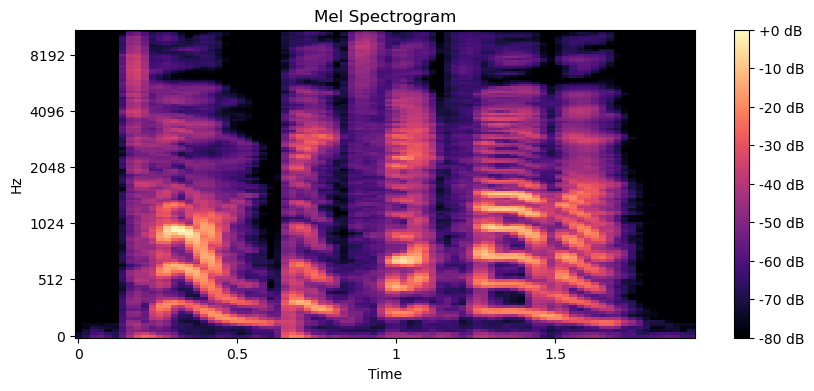

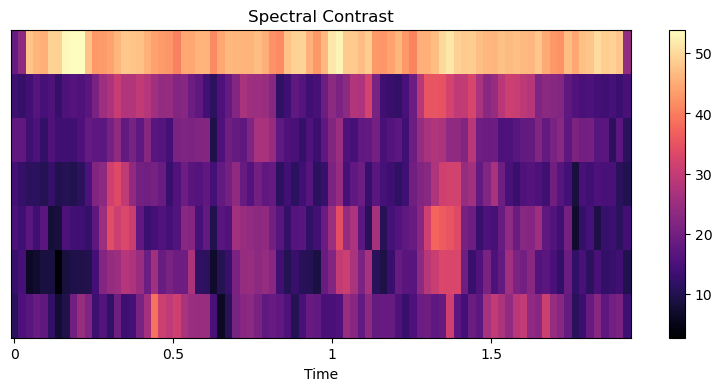

In [87]:
# Load an audio file
audio_file = 'E:/capstone/archive/Raw_data/wavfiles/female1_angry_1a_1.wav'
y, sr = librosa.load(audio_file)

# Calculate MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=512)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.show()

# Calculate chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

# Calculate mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

# Calculate spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.show()


In [60]:
# Define the path to your audio dataset
data_dir = 'E:/capstone/archive/Raw_data/wavfiles/'

# Function to extract features from audio files
def extract_features(file_path):
    audio, sr = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sr), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sr), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sr), axis=1)
    return np.concatenate((mfccs, chroma, mel, spectral_contrast))

# Create an empty list to store the features and labels
features = []
labels = []



In [ ]:
# Define a mapping from original labels to new emotions
label_mapping = {
    'encouraging': 'emotion_1',
    'assertive': 'emotion_2',
    'apologetic': 'emotion_3',
    'sad': 'emotion_4',
    'excited': 'emotion_5',
    'angry': 'emotion_6',
    'anxious': 'emotion_7',
    'happy': 'emotion_8',
    'neutral': 'emotion_9',
    'concerned': 'emotion_10'
}

# Iterate through the audio files and map the original labels to new emotions
for filename in os.listdir(data_dir):
    if filename.endswith('.wav'):
        emotion = filename.split('_')[1]
        # Map the emotion to the new label
        new_emotion = label_mapping[emotion]
        file_path = os.path.join(data_dir, filename)
        features.append(extract_features(file_path))
        labels.append(new_emotion)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Build a simple neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train[0].shape)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(np.array(X_train), np.array(y_train), epochs=1000, batch_size=16, validation_data=(np.array(X_test), np.array(y_test)))

# Evaluate the model
accuracy = model.evaluate(np.array(X_test), np.array(y_test))[1]
print(f'Test Accuracy: {accuracy}')

# Save the model
model.save('E:/capstone/ml_paper/speech_emotion_model.h5')

In [ ]:
print(f'Test Accuracy: {accuracy}')

In [80]:
import os
import numpy as np
import pyaudio
import librosa
from tensorflow import keras
from tensorflow.keras import layers

# Load your pre-trained speech emotion recognition model
model = keras.models.load_model('E:/capstone/ml_paper/Saved_Model/speech_emotion_model.h5')

# Function to extract audio features from a recorded audio clip
def extract_features(audio_data, sample_rate):
    audio_data = np.array(audio_data, dtype=float)
    mfccs = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sample_rate), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=audio_data, sr=sample_rate), axis=1)
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio_data, sr=sample_rate), axis=1)
    return np.concatenate((mfccs, chroma, mel, spectral_contrast))


In [81]:
# Function to predict the emotion from audio features
def predict_emotion(features):
    features = np.expand_dims(features, axis=0)  # Add a batch dimension
    emotion_class = model.predict(features)
    return emotion_class

# Function to record audio
def record_audio():
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16, channels=1, rate=44100, input=True, frames_per_buffer=1024)

    print("Recording... Press '2' to stop and predict emotion.")

    frames = []
    while True:
        try:
            key = input()
            if key == '2':
                break
            data = stream.read(1024)
            frames.append(data)
        except KeyboardInterrupt:
            break

    stream.stop_stream()
    stream.close()
    p.terminate()

    audio_data = np.frombuffer(b''.join(frames), dtype=np.int16)
    return audio_data

In [82]:
# Define the directory containing your audio files
data_dir = 'E:/capstone/archive/Raw_data/wavfiles/'

# Initialize a set to store unique emotion labels
unique_emotion_labels = set()

# Iterate over the audio files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.wav'):
        # Extract the emotion label from the filename
        emotion = filename.split('_')[1]
        # Add the label to the set to ensure uniqueness
        unique_emotion_labels.add(emotion)

# Convert the set of unique emotion labels to a list if needed
unique_emotion_list = list(unique_emotion_labels)

# Print the list of unique emotion labels
print("Unique Emotion Labels:", unique_emotion_list)

Unique Emotion Labels: ['assertive', 'happy', 'anxious', 'concerned', 'excited', 'sad', 'neutral', 'encouraging', 'apologetic', 'angry']


In [ ]:
#Graphs

In [62]:
# Define a mapping from original labels to new emotions
label_mapping = {
    'encouraging': 'emotion_1',
    'assertive': 'emotion_2',
    'apologetic': 'emotion_3',
    'sad': 'emotion_4',
    'excited': 'emotion_5',
    'angry': 'emotion_6',
    'anxious': 'emotion_7',
    'happy': 'emotion_8',
    'neutral': 'emotion_9',
    'concerned': 'emotion_10'
}

# Iterate through the audio files and map the original labels to new emotions
for filename in os.listdir(data_dir):
    if filename.endswith('.wav'):
        emotion = filename.split('_')[1]
        # Map the emotion to the new label
        new_emotion = label_mapping[emotion]
        file_path = os.path.join(data_dir, filename)
        features.append(extract_features(file_path))
        labels.append(new_emotion)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

22/22 [==============================] - 0s 1ms/step
Test Accuracy: 0.9359534206695779


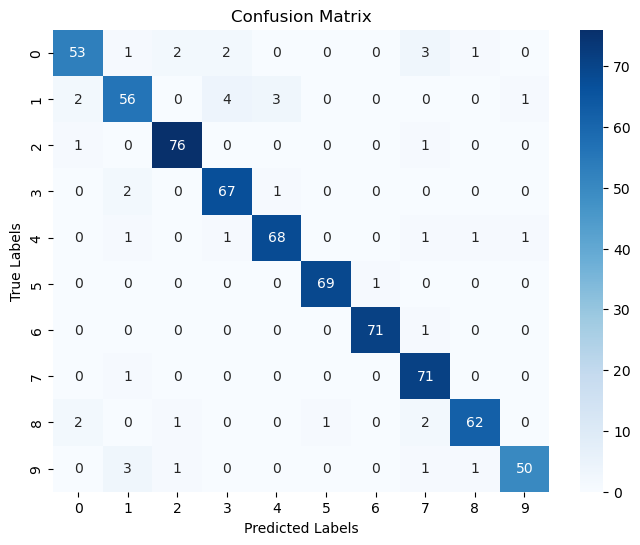

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model = keras.models.load_model('E:/capstone/ml_paper/Saved_Model/speech_emotion_model.h5')
# Use your trained model to make predictions on the testing data
y_pred = model.predict(np.array(X_test))
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
model = keras.models.load_model('E:/capstone/ml_paper/Saved_Model/speech_emotion_model.h5')
# Use your trained model to make predictions on the testing data
y_pred = model.predict(np.array(X_test))
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall}')




22/22 [==============================] - 0s 2ms/step
Test Accuracy: 0.9359534206695779
F1 Score: 0.9356441633261571
Precision: 0.9365876092348008
Recall: 0.9359534206695779


In [86]:
import numpy as np

# Assuming X_train and y_train are your training data and labels as lists
# Assuming X_test and y_test are your testing data and labels as lists

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Check the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Continue with the rest of your code


X_train shape: (2748, 160)
y_train shape: (2748,)
X_test shape: (687, 160)
y_test shape: (687,)


Epoch 1/10
86/86 [==============================] - 1s 4ms/step - loss: 0.3888 - accuracy: 0.9294 - val_loss: 0.4728 - val_accuracy: 0.8850
Epoch 2/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2891 - accuracy: 0.9400 - val_loss: 0.5100 - val_accuracy: 0.8705
Epoch 3/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2509 - accuracy: 0.9392 - val_loss: 0.4503 - val_accuracy: 0.9068
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9385 - val_loss: 0.3750 - val_accuracy: 0.9316
Epoch 5/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.9560 - val_loss: 0.4092 - val_accuracy: 0.9083
Epoch 6/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9494 - val_loss: 0.3993 - val_accuracy: 0.9243
Epoch 7/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.9592 - val_loss: 0.3201 - val_accuracy: 0.9476
Epoch 8/10
86/86 [==

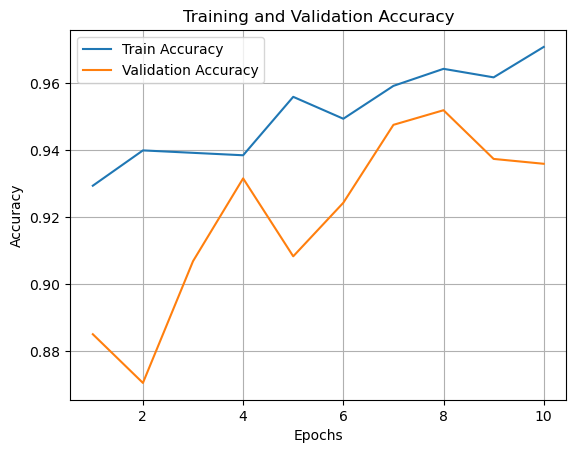

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

# Load your Keras model
model = keras.models.load_model('E:/capstone/ml_paper/Saved_Model/speech_emotion_model.h5')

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)  # Assuming you have 10 classes
y_test_encoded = to_categorical(y_test, num_classes=10)

# Compile the model with categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10, batch_size=32)

# Get training and validation accuracy values from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a plot for training and validation accuracy
plt.plot(np.arange(1, len(train_accuracy) + 1), train_accuracy, label='Train Accuracy')
plt.plot(np.arange(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
86/86 [==============================] - 1s 4ms/step - loss: 0.3809 - accuracy: 0.9189 - val_loss: 0.4522 - val_accuracy: 0.9141
Epoch 2/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9429 - val_loss: 0.3499 - val_accuracy: 0.9360
Epoch 3/10
86/86 [==============================] - 0s 3ms/step - loss: 0.2243 - accuracy: 0.9451 - val_loss: 0.3821 - val_accuracy: 0.9330
Epoch 4/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1684 - accuracy: 0.9585 - val_loss: 0.3336 - val_accuracy: 0.9447
Epoch 5/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1577 - accuracy: 0.9563 - val_loss: 0.3745 - val_accuracy: 0.9214
Epoch 6/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.3765 - val_accuracy: 0.9229
Epoch 7/10
86/86 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9640 - val_loss: 0.3479 - val_accuracy: 0.9389
Epoch 8/10
86/86 [==

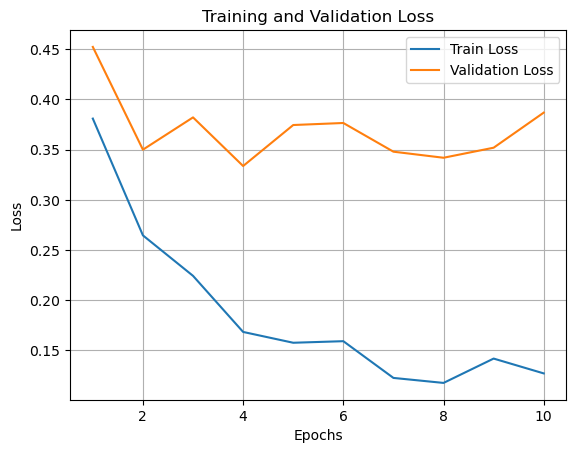

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

# Load your Keras model
model = keras.models.load_model('E:/capstone/ml_paper/Saved_Model/speech_emotion_model.h5')

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=10)  # Assuming you have 10 classes
y_test_encoded = to_categorical(y_test, num_classes=10)

# Compile the model with categorical_crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10, batch_size=32)

# Get training and validation loss values from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for training and validation loss
plt.plot(np.arange(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
